In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression#逻辑回归模型
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score #准确率 混淆矩阵 精确率 召回率

In [39]:
df = pd.read_csv('机器学习与深度学习\machine-learning\实践项目数据\titanic-data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df.fillna({'Age':df['Age'].median()},inplace=True)#年龄填充中位数
df.fillna({'Embarked':df['Embarked'].mode()[0]},inplace=True)#港口号 填充的众数

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
#对字符串的数据进行编码
df['Sex']= df['Sex'].map({'male':0,'female':1})
df['Embarked']= df['Embarked'].map({'C':0,'Q':1,'S':2})

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2


In [45]:
#提取特征和目标
X=df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=df['Survived']

In [46]:
#拆分数据集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [53]:
#进行数据的缩放 标准化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
X_train_scaler

array([[ 0.83257111,  1.38493061,  2.58804738, ..., -0.47873223,
        -0.46786277,  0.5952106 ],
       [-1.55771368, -0.72205784,  1.28730235, ..., -0.47873223,
         0.96140032, -1.90502507],
       [-0.36257129,  1.38493061, -0.08995709, ..., -0.47873223,
        -0.17194962, -1.90502507],
       ...,
       [-0.36257129,  1.38493061, -0.77858681, ..., -0.47873223,
        -0.13088622,  0.5952106 ],
       [ 0.83257111, -0.72205784,  1.21078794, ..., -0.47873223,
        -0.49943027,  0.5952106 ],
       [-0.36257129,  1.38493061,  0.06307173, ..., -0.47873223,
        -0.41114395, -0.65490724]])

In [48]:
#创建逻辑回归模型
model = LogisticRegression()
model.fit(X_train_scaler,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [52]:
#评估模型
y_pred=model.predict(X_test_scaler)
a=accuracy_score(y_test,y_pred)
print('模型的准确率是：',a)

模型的准确率是： 0.7821229050279329


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']#指定字体
plt.rcParams['axes.unicode_minus'] = False #显示负号

In [56]:
model.coef_[0]

array([-0.82693958,  1.35423012, -0.51471028, -0.40307812, -0.14614484,
        0.16581566, -0.11238907])

In [57]:
coeff = pd.Series(model.coef_[0],index=X.columns)

In [58]:
coeff = coeff.sort_values(ascending=False)

<Axes: >

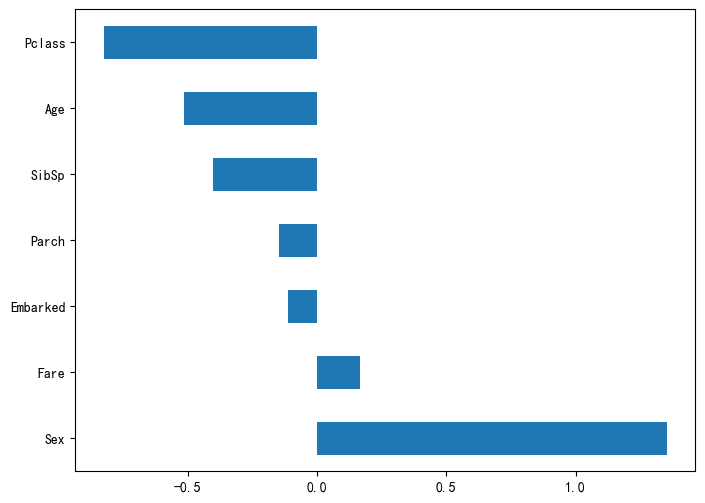

In [59]:
plt.figure(figsize=(8,6))
coeff.plot(kind='barh')

([<matplotlib.axis.XTick at 0x1d74d85d290>,
 [Text(0, 0, '男’'), Text(1, 0, '女')])

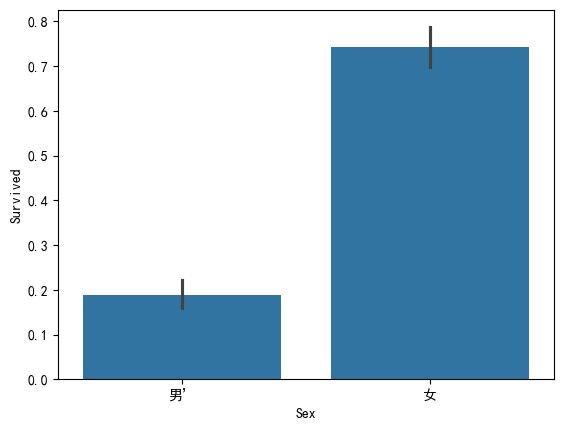

In [60]:
#性别 和生还率
sns.barplot(x='Sex',y='Survived',data=df)
plt.xticks([0,1],['男’','女'])

<Axes: xlabel='Pclass', ylabel='Survived'>

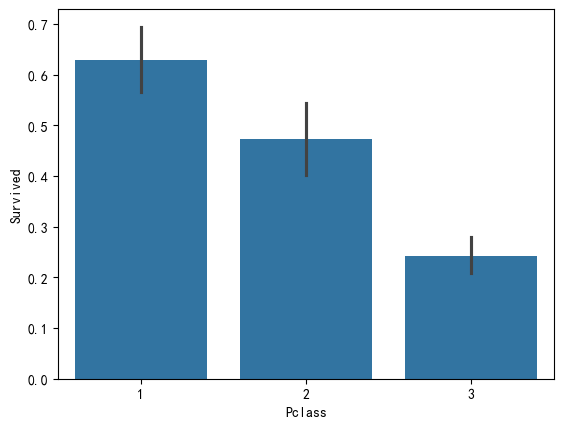

In [61]:
#舱位 与 生还率
sns.barplot(x='Pclass',y='Survived',data=df)

<Axes: xlabel='Age', ylabel='Count'>

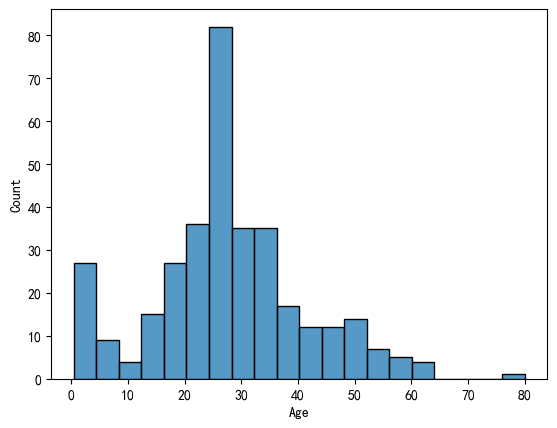

In [62]:
#年龄 与 生还率
sns.histplot(df[df['Survived']==1]['Age'])